In [7]:
import numpy as np
from cytoolz import identity
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

from gensim.models.wrappers import LdaVowpalWabbit
from gensim.matutils import Sparse2Corpus

In [9]:
def read_corpus(name):
    for line in open(name):
        yield [tok for tok in line.lower().split() if tok.isalpha() and tok not in ENGLISH_STOP_WORDS]

In [10]:
V = CountVectorizer(analyzer=identity, min_df=20, max_df=.5)
X = V.fit_transform(read_corpus('/opt/local/conspiracy-200k.txt'))

In [11]:
X.shape

(199732, 50563)

In [12]:
vwpath = '/opt/local/bin/vw'

In [13]:
vocab = dict((v,k) for (k,v) in V.vocabulary_.items())
corpus = Sparse2Corpus(X, documents_columns=False)

In [14]:
%%time

k = 75
lda = LdaVowpalWabbit(vwpath, corpus, id2word=vocab, alpha=1/k, eta=1/k, num_topics=k)

CPU times: user 35.9 s, sys: 237 ms, total: 36.1 s
Wall time: 4min 34s


In [15]:
lda.show_topics()

['0.165*tony + 0.143*broadcasting + 0.058*freud + 0.058*portugal + 0.049*marking + 0.044*descriptions + 0.022*portuguese + 0.022*abiotic + 0.021*bling + 0.020*madeleine',
 '0.074*cooper + 0.064*episode + 0.056*listen + 0.046*adam + 0.040*james + 0.037*listening + 0.036*book + 0.035*great + 0.028*ama + 0.025*check',
 '0.094*olympics + 0.061*knight + 0.059*hop + 0.042*olympic + 0.036*aerosol + 0.027*nick + 0.023*feinstein + 0.022*lennon + 0.020*perped + 0.020*molybdenum',
 '0.180*car + 0.072*cars + 0.043*driving + 0.037*drive + 0.034*vehicle + 0.034*driver + 0.028*road + 0.022*engine + 0.020*accident + 0.020*license',
 '0.558*jones + 0.087*joe + 0.076*interview + 0.041*martin + 0.025*rogan + 0.022*listened + 0.018*listen + 0.007*podcast + 0.006*guy + 0.006*jordan',
 '0.095*israel + 0.092*jews + 0.060*jewish + 0.039*zionist + 0.026*israeli + 0.023*zionists + 0.023*anti + 0.021*jew + 0.015*holocaust + 0.013*zionism',
 '0.012*cancer + 0.011*food + 0.011*vaccine + 0.010*flu + 0.008*vaccines 

In [16]:
T = lda.get_topics()

In [17]:
T.shape

(75, 50563)

In [19]:
def term_to_topics(term, t=0.01):
    vec = T[:,V.vocabulary_[term]]
    return list(np.nonzero(vec > t)[0])

In [25]:
term_to_topics('kennedy',0.001)

[14, 65]

In [26]:
lda.show_topic(65), lda.show_topic(14)

([(0.061026476, 'plane'),
  (0.03579673, 'pentagon'),
  (0.027859494, 'planes'),
  (0.021240167, 'flight'),
  (0.019286957, 'air'),
  (0.016836036, 'aircraft'),
  (0.01556307, 'crash'),
  (0.013998805, 'hit'),
  (0.01309337, 'flying'),
  (0.01283956, 'military')],
 [(0.04931316, 'obama'),
  (0.02441159, 'paul'),
  (0.01986041, 'president'),
  (0.019740302, 'bush'),
  (0.018488161, 'ron'),
  (0.01276458, 'party'),
  (0.008606819, 'political'),
  (0.00719178, 'right'),
  (0.007171116, 'media'),
  (0.007170652, 'republican')])

In [28]:
term_to_topics('gmo',0.001)

[6]

In [29]:
lda.show_topic(6)

[(0.012429553, 'cancer'),
 (0.011275802, 'food'),
 (0.010620969, 'vaccine'),
 (0.009613137, 'flu'),
 (0.0077309194, 'vaccines'),
 (0.007466435, 'health'),
 (0.006813445, 'monsanto'),
 (0.005853053, 'study'),
 (0.0053451327, 'virus'),
 (0.0053008394, 'disease')]

In [30]:
term_to_topics('moon',0.001)

[43]

In [31]:
lda.show_topic(43)

[(0.010570947, 'earth'),
 (0.006781754, 'time'),
 (0.0062258192, 'moon'),
 (0.006221685, 'space'),
 (0.006008058, 'aliens'),
 (0.004951934, 'years'),
 (0.0049329167, 'planet'),
 (0.004850756, 'does'),
 (0.0046831267, 'alien'),
 (0.004302676, 'ufo')]

In [32]:
%%time 

D = lda._predict(corpus)[0]

CPU times: user 38.3 s, sys: 355 ms, total: 38.7 s
Wall time: 4min 5s


In [33]:
D.shape

(199732, 75)

In [41]:
D[1,:]

array([6.8376015e-05, 6.8376015e-05, 6.8376015e-05, 6.8376015e-05,
       6.8376015e-05, 6.8376015e-05, 6.8376015e-05, 6.8376015e-05,
       6.8376015e-05, 6.8376015e-05, 6.8376015e-05, 6.8376015e-05,
       6.8376015e-05, 6.8376015e-05, 6.8376015e-05, 6.8376015e-05,
       6.8376015e-05, 6.8376015e-05, 6.8376015e-05, 6.8376015e-05,
       6.8376015e-05, 6.8376015e-05, 5.8693439e-01, 6.8376015e-05,
       6.8376525e-05, 6.8376015e-05, 6.8376015e-05, 8.8528872e-02,
       6.8376015e-05, 9.4337597e-02, 6.8376015e-05, 8.8058107e-02,
       6.8376015e-05, 6.8376015e-05, 6.8376015e-05, 6.8376015e-05,
       6.8376015e-05, 6.8376015e-05, 1.3090843e-02, 6.8376015e-05,
       6.8376015e-05, 6.8376015e-05, 6.8376015e-05, 6.8376015e-05,
       6.8376015e-05, 6.8376015e-05, 6.8376015e-05, 6.8376015e-05,
       6.8376015e-05, 6.8376015e-05, 6.8376015e-05, 6.8376015e-05,
       6.8376015e-05, 6.8376015e-05, 6.8376015e-05, 6.8376015e-05,
       2.3858812e-02, 6.8376015e-05, 6.8376015e-05, 6.8376015e

In [42]:
np.sort(D[:,1])

array([1.1220134e-06, 1.1395159e-06, 1.2090967e-06, ..., 2.9710522e-01,
       3.8490814e-01, 4.9984959e-01], dtype=float32)

In [43]:
np.argsort(D[1,:])

array([ 0, 51, 50, 49, 48, 47, 46, 52, 45, 43, 42, 41, 40, 39, 73, 44, 36,
       53, 55, 72, 71, 68, 67, 66, 65, 54, 64, 62, 61, 60, 59, 58, 57, 63,
       35, 37, 33, 14, 13, 12, 11, 10,  9, 34,  8,  6,  5,  4,  3,  2,  1,
        7, 16, 15, 18, 19, 32, 20, 21, 30, 23, 28, 25, 26, 17, 74, 24, 69,
       38, 56, 31, 27, 70, 29, 22])

In [44]:
lda.show_topic(22), lda.show_topic(29), lda.show_topic(70)

([(0.019209592, 'reddit'),
  (0.016833527, 'post'),
  (0.012505063, 'conspiracy'),
  (0.009225953, 'r'),
  (0.009069905, 'comments'),
  (0.008051941, 'posts'),
  (0.007463077, 'comment'),
  (0.0074209957, 'subreddit'),
  (0.0070462516, 'page'),
  (0.006639664, 'site')],
 [(0.014167913, 'law'),
  (0.013612784, 'government'),
  (0.0085298335, 'state'),
  (0.007631069, 'states'),
  (0.006769868, 'public'),
  (0.0061742803, 'security'),
  (0.0053589195, 'rights'),
  (0.0051079304, 'act'),
  (0.004819045, 'laws'),
  (0.0046671596, 'united')],
 [(0.01689206, 'conspiracy'),
  (0.0090449145, 'does'),
  (0.007951437, 'evidence'),
  (0.0077678775, 'believe'),
  (0.0068962597, 'truth'),
  (0.0058662808, 'say'),
  (0.0052562375, 'point'),
  (0.00517097, 'really'),
  (0.005041404, 'fact'),
  (0.004910185, 'make')])

In [47]:
term_to_topics('haarp', t=0.001)

[43]

In [48]:
lda.show_topic(43)

[(0.010570947, 'earth'),
 (0.006781754, 'time'),
 (0.0062258192, 'moon'),
 (0.006221685, 'space'),
 (0.006008058, 'aliens'),
 (0.004951934, 'years'),
 (0.0049329167, 'planet'),
 (0.004850756, 'does'),
 (0.0046831267, 'alien'),
 (0.004302676, 'ufo')]

In [49]:
np.argsort(D[:,43])

array([ 29627,  12832,  18105, ..., 185750, 108280,   7077])

In [51]:
np.argsort(D[7077,:])

array([ 0, 53, 52, 51, 50, 49, 48, 54, 47, 45, 44, 42, 41, 40, 39, 46, 55,
       56, 57, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58,
       38, 73, 37, 35, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1, 16, 17, 18, 19, 34, 33, 32, 31, 30, 29, 36, 28, 26, 25, 24,
       23, 22, 21, 20, 27, 74, 43])

In [52]:
lda.show_topic(74)

[(0.12351408, 'bin'),
 (0.11596859, 'laden'),
 (0.064268626, 'osama'),
 (0.058583025, 'game'),
 (0.03510481, 'team'),
 (0.030541938, 'games'),
 (0.019274333, 'obl'),
 (0.015925482, 'play'),
 (0.014598551, 'sports'),
 (0.013321561, 'football')]

In [58]:
term_to_topics('pizza', t=0.0001)

[44]

In [56]:
lda.show_topic(44)

[(0.013929236, 'music'),
 (0.009757301, 'hollywood'),
 (0.008398948, 'child'),
 (0.007061041, 'alex'),
 (0.0059647188, 'song'),
 (0.005521118, 'sex'),
 (0.0052520437, 'movies'),
 (0.0051279604, 'industry'),
 (0.004984133, 'porn'),
 (0.004941053, 'grove')]

In [59]:
total = np.count_nonzero(np.where(D>0.1,D,0.0),axis=0)
total

array([     8,    347,     19,    398,     87,   9452,  14283,      6,
         9441,   2364,     12,    655,    225,      2,  30116,      1,
        43260,     15,      3, 134694,      7,  15497,  38373,      2,
          849,     79,  16127,    927,      1,  32634,   4324,  49095,
         6780,   3930,    391,     32,     22,     20,   2860,   3254,
          602,  28066,     68,  24407,  11497,     20,      6,      6,
          273,     44,   2972,     76,     15,     16,   1123,      0,
        19753,  21008,     60,   1510,    163,      6,     10,     24,
          981,   4280,     11,      2,     18,  16486,  75912,   3356,
            2,      3,    666])

In [66]:
total[2]

19

In [61]:
np.argsort(total)

array([55, 15, 28, 23, 72, 67, 13, 73, 18, 46,  7, 61, 47, 20,  0, 62, 66,
       10, 17, 52, 53, 68,  2, 45, 37, 36, 63, 35, 49, 58, 42, 51, 25,  4,
       60, 12, 48,  1, 34,  3, 40, 11, 74, 24, 27, 64, 54, 59,  9, 38, 50,
       39, 71, 33, 65, 30, 32,  8,  5, 44,  6, 21, 26, 69, 56, 57, 43, 41,
       14, 29, 22, 16, 31, 70, 19])

In [62]:
lda.show_topic(39)

[(0.10645409, 'iran'),
 (0.0944573, 'nuclear'),
 (0.048704173, 'china'),
 (0.035525687, 'war'),
 (0.031856045, 'weapons'),
 (0.027171787, 'north'),
 (0.026390575, 'japan'),
 (0.024531955, 'russia'),
 (0.022812387, 'attack'),
 (0.021032993, 'korea')]

In [63]:
lda.show_topic(65)

[(0.061026476, 'plane'),
 (0.03579673, 'pentagon'),
 (0.027859494, 'planes'),
 (0.021240167, 'flight'),
 (0.019286957, 'air'),
 (0.016836036, 'aircraft'),
 (0.01556307, 'crash'),
 (0.013998805, 'hit'),
 (0.01309337, 'flying'),
 (0.01283956, 'military')]

In [64]:
lda.show_topic(6)

[(0.012429553, 'cancer'),
 (0.011275802, 'food'),
 (0.010620969, 'vaccine'),
 (0.009613137, 'flu'),
 (0.0077309194, 'vaccines'),
 (0.007466435, 'health'),
 (0.006813445, 'monsanto'),
 (0.005853053, 'study'),
 (0.0053451327, 'virus'),
 (0.0053008394, 'disease')]

In [65]:
lda.show_topic(74)

[(0.12351408, 'bin'),
 (0.11596859, 'laden'),
 (0.064268626, 'osama'),
 (0.058583025, 'game'),
 (0.03510481, 'team'),
 (0.030541938, 'games'),
 (0.019274333, 'obl'),
 (0.015925482, 'play'),
 (0.014598551, 'sports'),
 (0.013321561, 'football')]

----

In [68]:
docs = [ np.nonzero(r>0.1)[0] for r in D ]
docs[:5]

[array([19, 22, 31]),
 array([22]),
 array([ 5, 19, 22, 31, 44]),
 array([19, 57, 70]),
 array([14, 19, 69])]

In [69]:
lda.show_topic(14), lda.show_topic(19), lda.show_topic(69)

([(0.04931316, 'obama'),
  (0.02441159, 'paul'),
  (0.01986041, 'president'),
  (0.019740302, 'bush'),
  (0.018488161, 'ron'),
  (0.01276458, 'party'),
  (0.008606819, 'political'),
  (0.00719178, 'right'),
  (0.007171116, 'media'),
  (0.007170652, 'republican')],
 [(0.0089006685, 'really'),
  (0.00871591, 'does'),
  (0.0077179926, 'did'),
  (0.00756707, 'good'),
  (0.0074772607, 'want'),
  (0.007441294, 'going'),
  (0.0071153548, 'way'),
  (0.0070649306, 'make'),
  (0.0068441476, 'say'),
  (0.006617901, 'right')],
 [(0.039725855, 'cia'),
  (0.023206873, 'information'),
  (0.021003693, 'nsa'),
  (0.017475141, 'intelligence'),
  (0.015800301, 'news'),
  (0.015607016, 'government'),
  (0.013604545, 'media'),
  (0.012713987, 'anonymous'),
  (0.011919703, 'documents'),
  (0.011795141, 'russian')])

In [70]:
from collections import Counter
from math import log2

In [74]:
def fPMI(topic):
    freq = Counter()
    for doc in docs:
        if topic in doc:
            for t in doc:
                freq[t] += 1
    pmi = Counter()
    for t in total:
        if t != topic and freq[t] > 5:
            pmi[t] = log2((freq[t]*total.sum()) / (total[t]*total[topic]))
    return pmi

In [75]:
fPMI(6)

Counter({1: -0.38164008490381024,
         3: 1.4205271471308019,
         8: 0.13783002251711893,
         11: 1.3647656839720672,
         12: 1.2433705764574134,
         16: 0.8503416981123295,
         19: 1.647789393675322,
         22: 0.7007397433068072,
         24: 4.346194868386448,
         32: 2.845782047934787,
         44: -0.5410471384729983})

In [76]:
lda.show_topic(6), lda.show_topic(24), lda.show_topic(32), 

([(0.012429553, 'cancer'),
  (0.011275802, 'food'),
  (0.010620969, 'vaccine'),
  (0.009613137, 'flu'),
  (0.0077309194, 'vaccines'),
  (0.007466435, 'health'),
  (0.006813445, 'monsanto'),
  (0.005853053, 'study'),
  (0.0053451327, 'virus'),
  (0.0053008394, 'disease')],
 [(0.26112866, 'water'),
  (0.10368891, 'oil'),
  (0.024352519, 'city'),
  (0.016406815, 'supply'),
  (0.015905278, 'waste'),
  (0.014408364, 'area'),
  (0.014012262, 'drink'),
  (0.011387683, 'areas'),
  (0.010812333, 'clean'),
  (0.009918066, 'iq')],
 [(0.020544859, 'human'),
  (0.018798575, 'life'),
  (0.011786925, 'mind'),
  (0.011269686, 'society'),
  (0.010752799, 'mental'),
  (0.00959167, 'brain'),
  (0.008154565, 'experience'),
  (0.007571746, 'self'),
  (0.007564443, 'person'),
  (0.0070469743, 'feel')])

----

In [77]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import nx_pydot

%matplotlib inline

In [86]:
G = nx.Graph()
for i in range(k):
    t = fPMI(i)
    for j in t:
        if i!=j and t[j]>2.5:
            G.add_edge(i,j)

In [87]:
labels = dict((t, lda.show_topic(t)[0][1]) for t in range(lda.num_topics) if t in G)
labels[71] = 'al qaeda'

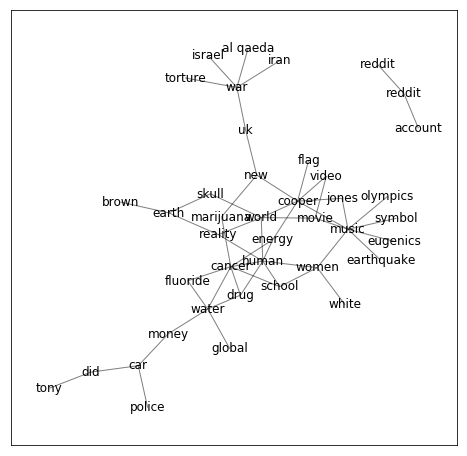

In [88]:
plt.figure(figsize=(8,8))
layout = nx_pydot.graphviz_layout(G)
nx.draw_networkx_edges(G, layout, alpha=0.5)
nx.draw_networkx_labels(G, layout, labels)
plt.xticks([],[])
plt.yticks([],[])
plt.show()

In [82]:
labels

{0: 'tony',
 1: 'cooper',
 2: 'olympics',
 3: 'car',
 4: 'jones',
 5: 'israel',
 6: 'cancer',
 8: 'new',
 9: 'school',
 10: 'brown',
 11: 'women',
 12: 'movie',
 16: 'war',
 21: 'world',
 22: 'reddit',
 24: 'water',
 25: 'land',
 26: 'police',
 27: 'reddit',
 29: 'law',
 30: 'account',
 31: 'did',
 32: 'human',
 33: 'building',
 34: 'fluoride',
 37: 'torture',
 38: 'flag',
 39: 'iran',
 40: 'drug',
 41: 'money',
 42: 'marijuana',
 43: 'earth',
 44: 'music',
 45: 'eugenics',
 48: 'wikileaks',
 49: 'uk',
 50: 'global',
 51: 'earthquake',
 54: 'energy',
 56: 'video',
 57: 'white',
 58: 'symbol',
 60: 'reality',
 64: 'prison',
 68: 'skull',
 70: 'conspiracy',
 71: 'al'}

In [83]:
lda.show_topic(71)

[(0.07328903, 'al'),
 (0.056384176, 'iraq'),
 (0.040269192, 'terrorist'),
 (0.040258795, 'syria'),
 (0.039076023, 'qaeda'),
 (0.039032582, 'afghanistan'),
 (0.03833021, 'libya'),
 (0.03470126, 'cia'),
 (0.026541099, 'attack'),
 (0.023899982, 'pakistan')]